<a href="https://colab.research.google.com/github/abhishekkr8399/ML/blob/main/ML_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<Axes: xlabel='age', ylabel='Count'>

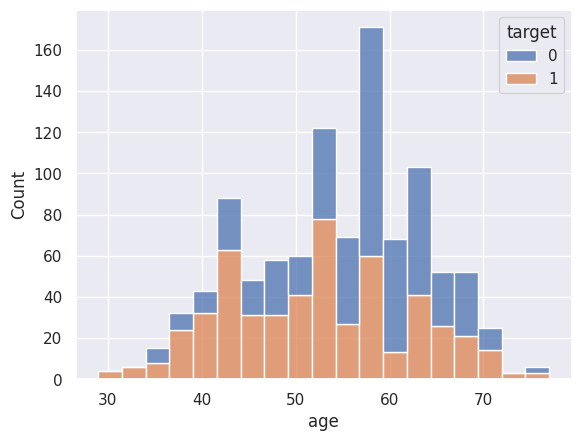

In [ ]:
sns.histplot(data=df,x="age",hue="target",multiple="stack")

<Axes: xlabel='chol', ylabel='Count'>

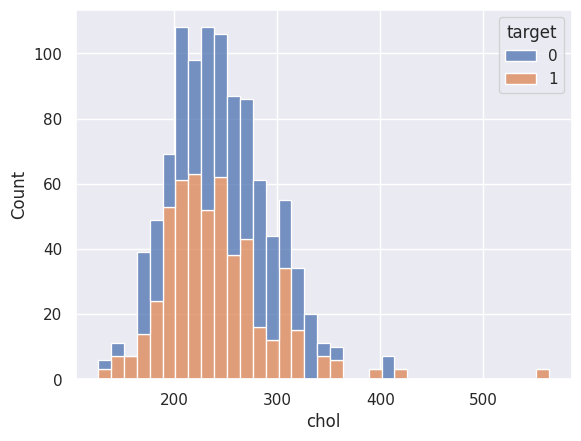

In [ ]:
sns.histplot(data=df,x="chol",hue="target",multiple="stack")

<Axes: xlabel='trestbps', ylabel='Count'>

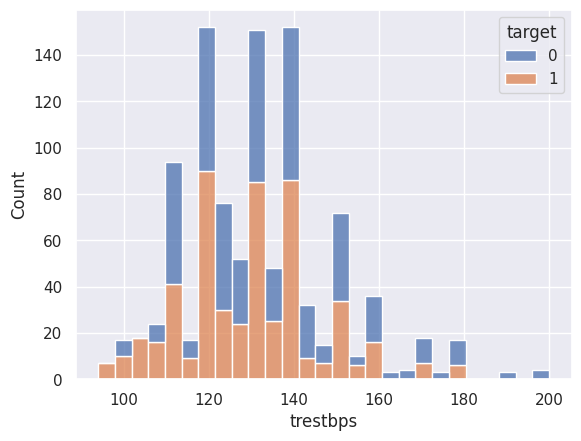

In [ ]:
sns.histplot(data=df,x="trestbps",hue="target",multiple="stack")

<Axes: xlabel='thalach', ylabel='Count'>

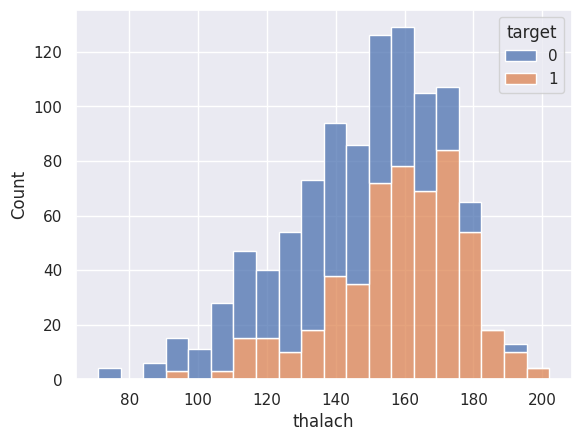

In [ ]:
sns.histplot(data=df,x="thalach",hue="target",multiple="stack")

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1    526
0    499
Name: target, dtype: int64


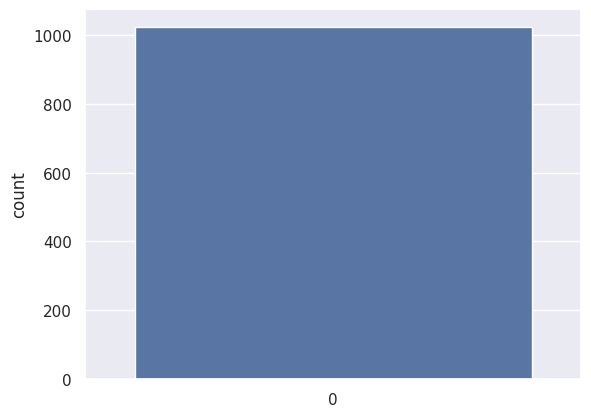

In [ ]:
sns.countplot(df['target'])
print(df.target.value_counts())

<Axes: xlabel='age'>

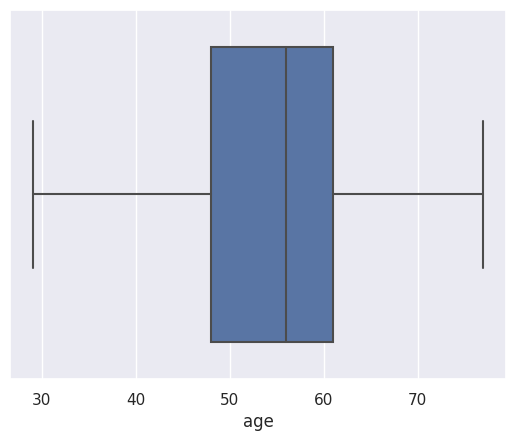

In [ ]:
sns.boxplot(x=df["age"])

<Axes: xlabel='trestbps'>

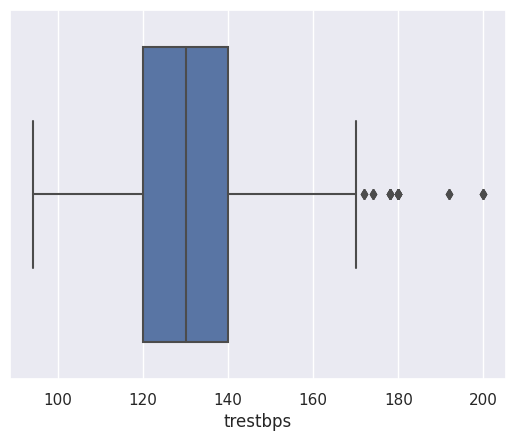

In [ ]:
sns.boxplot(x=df["trestbps"])

<Axes: xlabel='chol'>

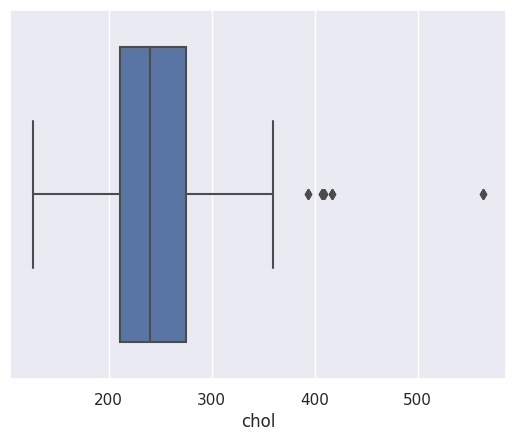

In [ ]:
sns.boxplot(x=df["chol"])

<Axes: xlabel='thalach'>

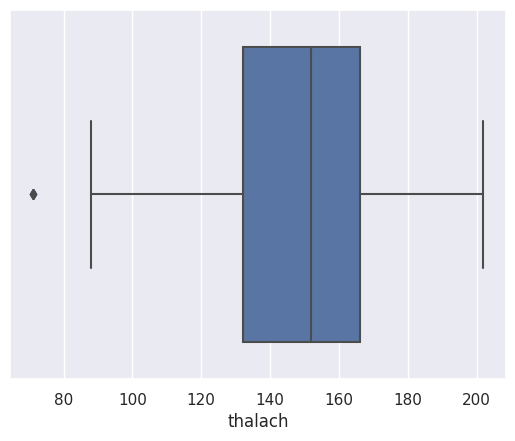

In [ ]:
sns.boxplot(x=df["thalach"])

<Axes: xlabel='oldpeak'>

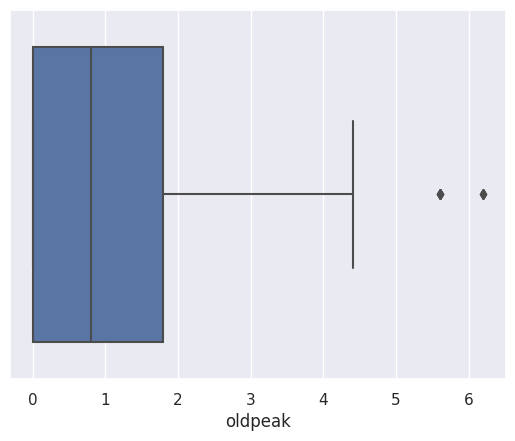

In [ ]:
sns.boxplot(x=df["oldpeak"])

In [ ]:
import scipy.stats as stats
z=np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(969, 14)

<Axes: >

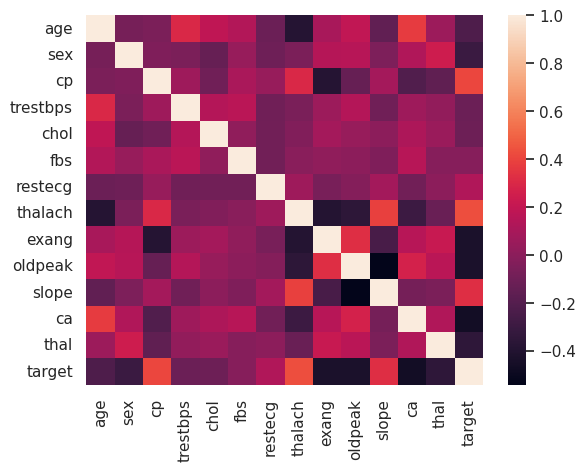

In [ ]:
sns.heatmap(data_clean.corr(),fmt='.2g')

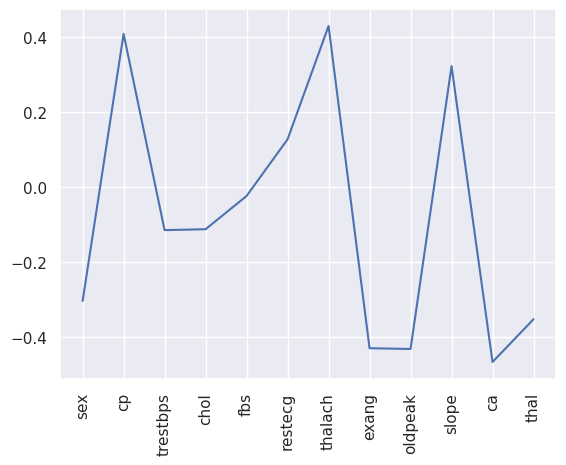

In [ ]:
corr=data_clean[data_clean.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

In [ ]:
x=data_clean.drop('target',axis=1)
y=data_clean['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=dtree.predict(x_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy score: 100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score:',(f1_score(y_test,y_pred)))
print("precision Score",(precision_score(y_test,y_pred)))    
print("Recall Score",(recall_score(y_test,y_pred)))

F-1 Score: 1.0
precision Score 1.0
Recall Score 1.0


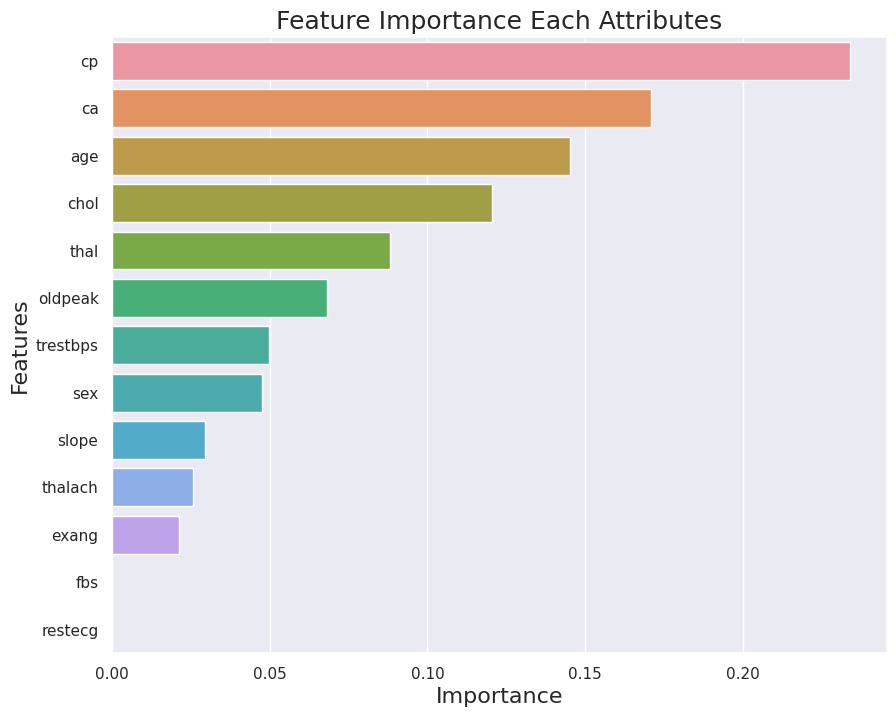

In [ ]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":dtree.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi,x="Importance",y='Feature Name')
plt.title("Feature Importance Each Attributes",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Features",fontsize=16)
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred=rfc.predict(x_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy score: 100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score:',(f1_score(y_test,y_pred)))
print("precision Score",(precision_score(y_test,y_pred)))    
print("Recall Score",(recall_score(y_test,y_pred)))

F-1 Score: 1.0
precision Score 1.0
Recall Score 1.0


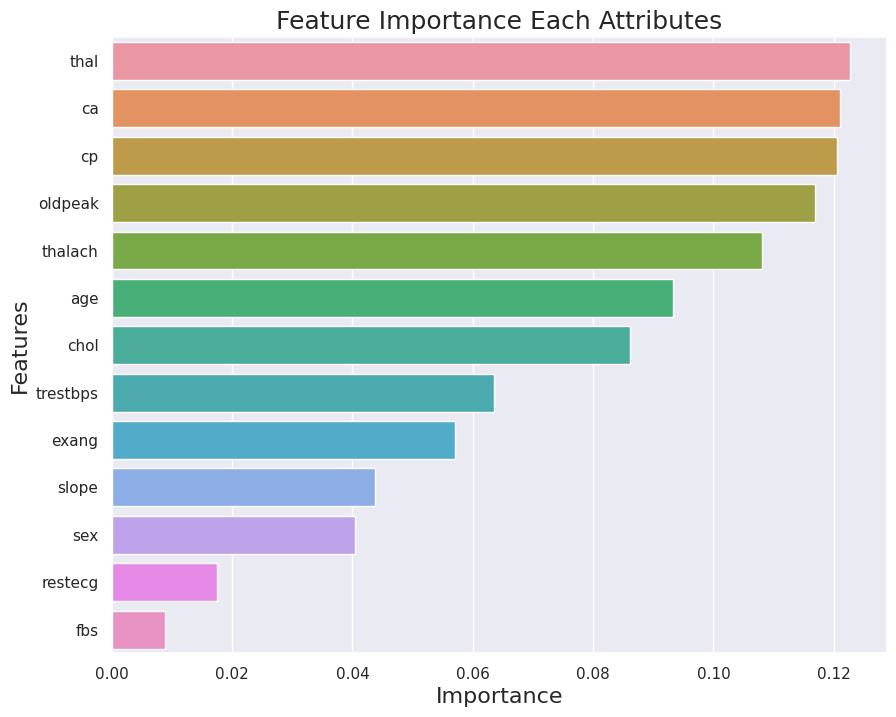

In [ ]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":rfc.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi,x="Importance",y='Feature Name')
plt.title("Feature Importance Each Attributes",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Features",fontsize=16)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred=ada.predict(x_test)
print("Accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy score: 93.3 %


In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score:',(f1_score(y_test,y_pred)))
print("precision Score",(precision_score(y_test,y_pred)))    
print("Recall Score",(recall_score(y_test,y_pred)))

F-1 Score: 0.9365853658536586
precision Score 0.9411764705882353
Recall Score 0.9320388349514563


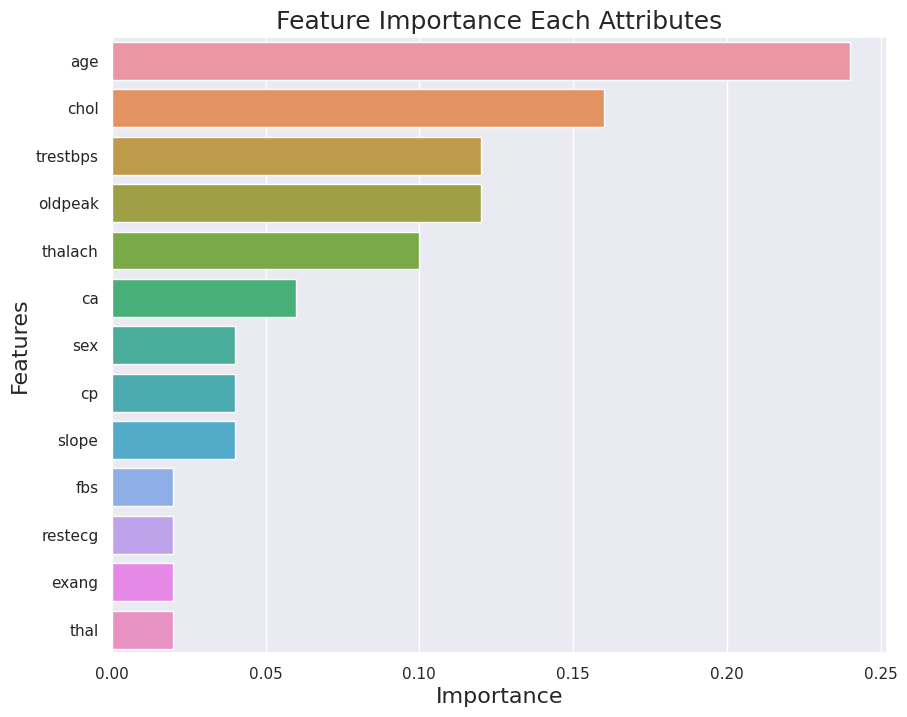

In [ ]:
imp_df=pd.DataFrame({
    "Feature Name":x_train.columns,
    "Importance":ada.feature_importances_
})
fi=imp_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi,x="Importance",y='Feature Name')
plt.title("Feature Importance Each Attributes",fontsize=18)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Features",fontsize=16)
plt.show()